In [3]:
# STEP 1 - IMPORTS
# Import relevant Python libraries and modules.
import pandas as pd #To read csv file , handle missing data set and cleaning data
import matplotlib.pyplot as plt #for plots barchart , histogram 
import seaborn as sns #for creating complex visualisation
from statsmodels.formula.api import ols #for statistical tests, hypothesis testing , Implementing various types of regression analysis (like Ordinary Least Squares - OLS
import statsmodels.api as sm 

In [4]:
# STEP 1 - IMPORTS
#Load the dataset into a DataFrame and save in a variable


data = pd.read_csv("marketing_sales_data.csv")

# STEP - 2 - DATA EXPLORATION


In [5]:
# Display the first 10 rows of the data



data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [6]:
# Display number of rows, number of columns - To check how large the data is 
data.shape


(572, 5)

In [7]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing


data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [8]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row


data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [9]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values



data.isna().any(axis=1).sum()

3

In [10]:
#Drop number of rows in data cleansing - This is the important step , it makes the data more usable for the analysis and regression that you will conduct next.
# Step 1. Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped
# Step 2. To update the DataFrame, reassign it to the result


data = data.dropna(axis=0)

In [11]:
# Check to make sure that the data does not contain any rows with missing values now

# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values

#Again we are using this isna to check whether we have any missing values after dropping the axis.

data.isna().any(axis=1).sum()

0

# CHECK MODEL ASSUMPTIONS


You would like to explore the relationship between radio promotion budget and sales. You could model the relationship using linear regression. To do this, you want to check if the model assumptions for linear regression can be made in this context. Some of the assumptions can be addressed before the model is built --- you will address those in this section. After the model is built, you can finish checking the assumptions.


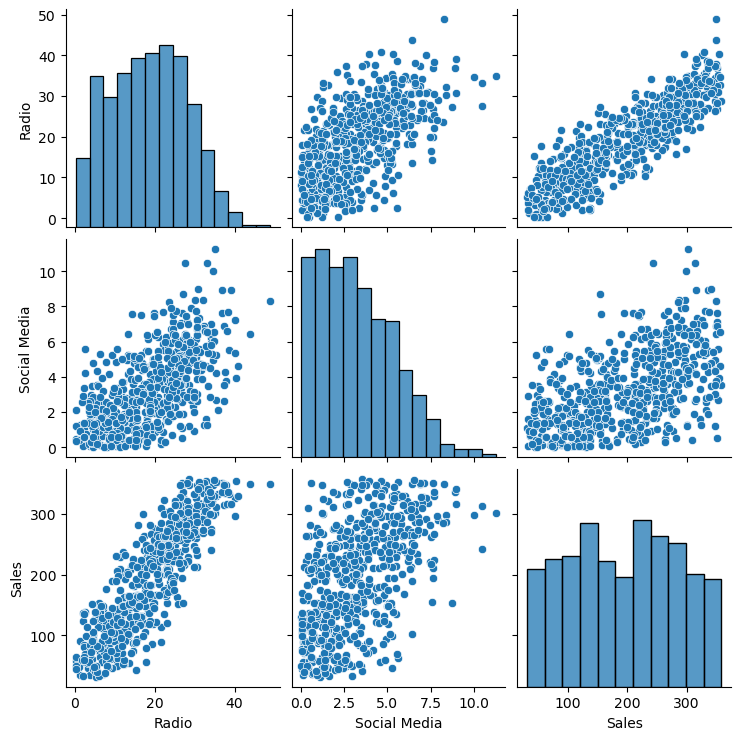

In [12]:
# Create plot of pairwise relationships

### YOUR CODE HERE ###

sns.pairplot(data)

# STEP 3 : MODEL BUILDING

Start by selecting only the columns that are needed for the model that you will build from the data.


In [13]:
# Select relevant columns
# Save resulting DataFrame in a separate variable to prepare for regression


ols_data = data[["Radio", "Sales"]]

In [14]:
# Display first 10 rows of the new DataFrame

### YOUR CODE HERE ###

ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


Write the linear regression formula for modeling the relationship between the two variables of interest.¶

In [15]:
# Write the linear regression formula
# Save it in a variable

#Dependant ~ Independant 
#So here the Depending how changes in the "Radio" advertising spending might affect or predict changes in "Sales."

ols_formula = "Sales ~ Radio"

In [18]:
#Implement the Ordinary Least Squares (OLS) approach for linear regression.
# Implement OLS



OLS = ols(formula = ols_formula, data = ols_data)


In [19]:
#Create a linear regression model for the data and fit the model to the data.

# Fit the model to the data
# Save the fitted model in a variable



model = OLS.fit()

# Step 4. Results and Evaluation

In [20]:
# Get summary of results


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          2.07e-176
Time:                        21:04:43   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analyze the bottom table from the results summary.
Based on that table, identify the coefficients that the model determined would generate the line of best fit, the coefficients here being the y-intercept and the slope.

Question 5: What is the y-intercept?
The y-intercept is 41.5326.

Question 6: What is the slope?
The slope is 8.1733.

Question 7: What is the linear equation you would write to express the relationship between sales and radio promotion budget in the form of y = slope * x + y-intercept?

sales = 8.1733 * radio promotion budget + 41.5326

Question 8: What do you think the slope in this context means?
One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.

Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

Finish checking model assumptions.
Now that you've built the linear regression model and fit it to the data, you can finish checking the model assumptions. This will help confirm your findings.

# Checking linear regression assumptions

STEP 1 :  CHECKING BEST FIT

<Axes: xlabel='Radio', ylabel='Sales'>

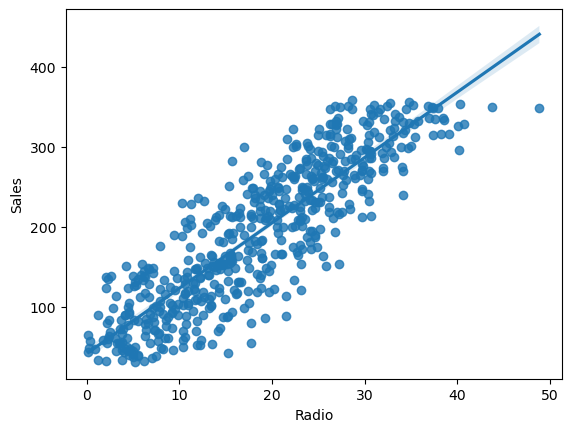

In [21]:
#Plot the OLS data with the best fit regression line.

# Plot the OLS data with the best fit regression line


sns.regplot(x = "Radio", y = "Sales", data = ols_data)


#Question 9: What do you observe from the preceding regression plot?
#The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

# STEP 2 : Check the normality assumption.

In [22]:
# Get the residuals from the model



residuals = model.resid

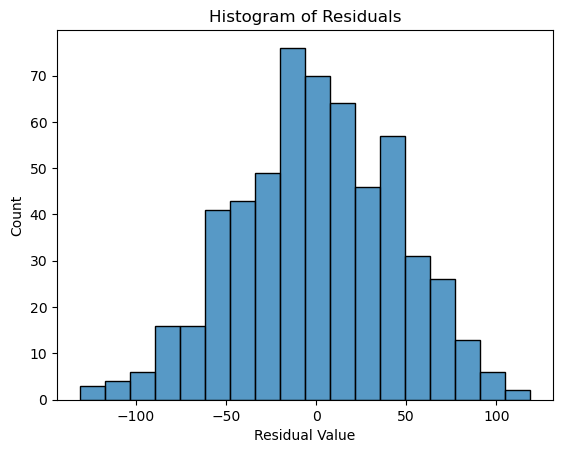

In [23]:
# Visualize the distribution of the residuals



fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()





#Question 10: Based on the preceding visualization, what do you observe about the distribution of the residuals?
#Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.

# Create a Q-Q plot to confirm the assumption of normality.

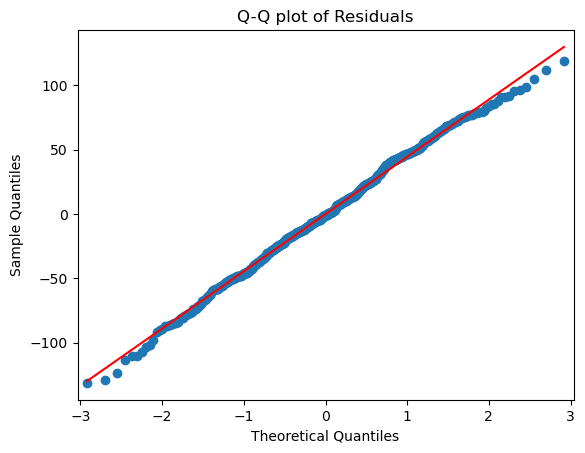

In [25]:
# Create a Q-Q plot 

### YOUR CODE HERE ###

sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()



#Question 11: Is the assumption of normality met?
#In the preceding Q-Q plot, the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

# STEP 3 : Check the assumptions of independent observation and homoscedasticity

In [26]:
# Get fitted values



fitted_values = model.predict(ols_data["Radio"])

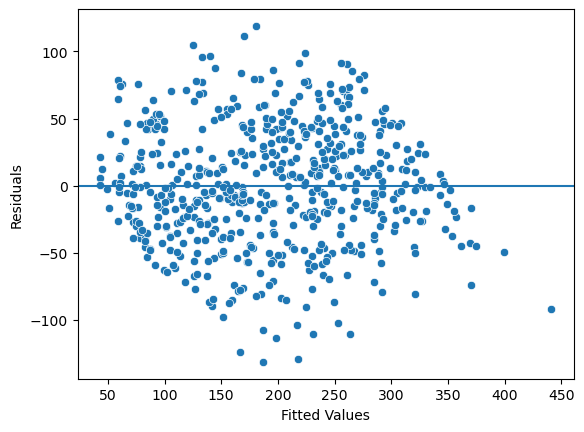

In [28]:
# Create a scatterplot of residuals against fitted values

### YOUR CODE HERE ###

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()




#Question 12: Are the assumptions of independent observation and homoscedasticity met?
#In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

# CONCLUSION


What results can be presented from this lab?

In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. 

One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average. 

Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05).
This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true.


In this context, 
the null hypothesis : is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis : is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.

How would you frame your findings to external stakeholders?

Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between radio promotion budget and sales for companies in this data, with a p-value of 0.000 and standard error of 0.194. For companies represented by this data, a 1 million dollar increase in radio promotion budget could be associated with a 8.1733 million dollar increase in sales. It would be worth continuing to promote products/services on the radio. Also, it is recommended to consider further examining the relationship between the two variables (radio promotion budget and sales) in different contexts. For example, it would help to gather more data to understand whether this relationship is different in certain industries or when promoting certain types of products/services.




Sure! Imagine you have two things: how much money a company spends on radio ads and how much stuff they sell because of those ads. We want to figure out if spending more on radio ads is connected to selling more stuff.

So, the grown-ups have two ideas they want to check:

Idea 1 (Null Hypothesis): They think maybe spending money on radio ads doesn't really make a difference in how much stuff gets sold. It's like saying, "Maybe the money spent on ads doesn't affect sales at all."
Idea 2 (Alternative Hypothesis): But they also think, "Wait, maybe spending more on radio ads actually does make a difference in how much stuff gets sold."
To check this, they look at a lot of data from different companies. And when they study this data, they find something important:

The p-value, which is a number that tells us how likely it is to see this data if the first idea (that ads don't affect sales) was true, is super, super small. This makes them think, "Wow, it's very unlikely to see this data if ads didn't really help sell more stuff!"
So, because the p-value is so tiny, they say, "You know what? We don't think ads don't help. We think there's a connection between spending on ads and selling more things for these companies." This means they're rejecting the first idea and saying, "Yep, ads probably do help sell more stuff!"




P-value: The p-value measures the strength of evidence against a null hypothesis (a hypothesis that says there's no relationship between variables). A p-value of 0.000 is very small, suggesting strong evidence against this null hypothesis. In simpler terms, it means that the relationship found between radio promotion budget and sales is very unlikely to have happened by chance.

Coefficient (8.1733): This number suggests that for every extra million dollars spent on radio promotion, companies might earn around 8.1733 million dollars more in sales, based on this dataset.

Standard Error (0.194): It measures the accuracy of the estimate. A low standard error means the estimate is more reliable.

So, they concluded that because the p-value is very low and the estimate for the relationship between radio promotion budget and sales is quite high (8.1733), there seems to be a strong, positive association between spending on radio ads and sales.